In [1]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import numpy.linalg as LA
from scipy.linalg import lu
import cmath

In [2]:
## Example 5.7
def Hilbert(n):
    A=np.zeros((n,n))
    for i in range (n):
        for j in range(n):
            A[i,j]=1/(i+j+1)
    return A
n=4
H=Hilbert(n)

def vhouse(x):
    x=x.reshape(-1,1)
    norm_x=LA.norm(x)
    x_hat=np.zeros(x.shape)
    x_hat[0]=norm_x
    v=x-x_hat
    v_norm=LA.norm(v)
    return v,v_norm


Q=np.eye(n)
for k in range(n-2):
    v,v_norm=vhouse(H[k+1:n,k])
    R=np.eye(v.size)-2*v@v.T/(v_norm**2)  ##R size is (n-k-1)*(n-k-1)
    P=np.zeros((n,n))
    for i in range(k+1):
        P[i,i]=1
    P[k+1:n,k+1:n]=R
    H=P@H@P.T
    Q=P@Q
np.set_printoptions(precision=4,suppress=True)
print(" Q is ")
print(Q.T)
print(" ")
print("After Householder, H becomes")
print(H)


 Q is 
[[ 1.      0.      0.      0.    ]
 [ 0.      0.7682 -0.608   0.2003]
 [ 0.      0.5121  0.396  -0.7622]
 [ 0.      0.3841  0.6881  0.6156]]
 
After Householder, H becomes
[[1.     0.6509 0.     0.    ]
 [0.6509 0.6506 0.0639 0.    ]
 [0.     0.0639 0.0253 0.0012]
 [0.     0.     0.0012 0.0003]]


In [3]:
## Example 5.8
A=np.zeros((5,5))
A[0,:]=[3,17,-37,18,-40]
for i in range(4):
    A[i+1,i]=1
u,w=LA.eig(A)
print(" A is")
print(A)
print("  ")
print(" A's eigenvalue is")
print(u)
print("  ")
n=A.shape[0]
def Givens_Matrix(A,j):
    n=A.shape[0]
    G=np.eye(n)
    alpha=math.sqrt(np.abs(A[j,j])**2+np.abs(A[j+1,j]**2))
    G[j,j],G[j+1,j+1]=A[j,j]/alpha,A[j,j]/alpha
    G[j+1,j],G[j,j+1]=A[j+1,j]/alpha,-A[j+1,j]/alpha
    return G


def QR_givens(A):
    n=A.shape[0]
    Atemp=A.copy()
    G_whole=np.eye(n)
    for j in range(n-1):
        G_whole=G_whole @ Givens_Matrix(Atemp,j)
        Atemp=Givens_Matrix(Atemp,j).T@Atemp
    # print(Atemp)
    # print(G_whole.T@G_whole)
    return Atemp@G_whole

for k in range(40):
    A=QR_givens(A)
print("After 40 iteration, T^(40) is")
print(A)

 A is
[[  3.  17. -37.  18. -40.]
 [  1.   0.   0.   0.   0.]
 [  0.   1.   0.   0.   0.]
 [  0.   0.   1.   0.   0.]
 [  0.   0.   0.   1.   0.]]
  
 A's eigenvalue is
[ 5.+0.j -4.+0.j  2.+0.j  0.+1.j  0.-1.j]
  
After 40 iteration, T^(40) is
[[  4.9997  18.9739 -34.257   32.876  -28.4604]
 [  0.0002  -3.9997   6.7693  -6.4968   5.6216]
 [  0.       0.       2.      -1.4557   1.1562]
 [ -0.      -0.       0.       0.3129  -0.8709]
 [ -0.      -0.      -0.       1.2607  -0.3129]]


In [4]:
## Example 5.9
A=np.array([[17,24,1,8,15],[23,5,7,14,16],[4,6,13,20,22],[10,12,19,21,3],[11,18,25,2,9]])
u,v=LA.eig(A)
print("A is ")
print(A)
print("      ")
print("eigenvalue of A is " )
print(u)
print("      ")
n=5
for k in range(n-2):
    v,v_norm=vhouse(A[k+1:n,k])
    R=np.eye(v.size)-2*v@v.T/(v_norm**2)  ##R size is (n-k-1)*(n-k-1)
    P=np.zeros((n,n))
    for i in range(k+1):
        P[i,i]=1
    P[k+1:n,k+1:n]=R
    A=P@A@P.T

for k in range(40):
    A=QR_givens(A)

print("After 40 iteration, T^(40) is")
print(A)

A is 
[[17 24  1  8 15]
 [23  5  7 14 16]
 [ 4  6 13 20 22]
 [10 12 19 21  3]
 [11 18 25  2  9]]
      
eigenvalue of A is 
[ 65.     -21.2768 -13.1263  21.2768  13.1263]
      
After 40 iteration, T^(40) is
[[ 65.       0.       0.      -0.      -0.    ]
 [  0.      14.6701  14.2435   4.4848  -3.4375]
 [ -0.      16.6735 -14.6701  -1.2159   2.0416]
 [  0.      -0.       0.     -13.0293  -0.7643]
 [  0.      -0.      -0.      -3.3173  13.0293]]


In [5]:
## Example 5.10
def QR_givens_single_shift(A,mu):
    n=A.shape[0]
    Atemp=A.copy()-mu*np.eye(n)
    G_whole=np.eye(n)
    for j in range(n-1):
        G_whole=G_whole @ Givens_Matrix(Atemp,j)
        Atemp=Givens_Matrix(Atemp,j).T@Atemp
    # print(Atemp)
    # print(G_whole.T@G_whole)
    return Atemp@G_whole+mu*np.eye(n)
iter=0
print("By example 5.9, real schur form of A is ")
print(A)
print("--------------------------------------------------")
for k in reversed(range(1,n)):
    while (  np.abs(A[k,k-1])>=0.00000001*(np.abs(A[k-1,k-1])+np.abs(A[k,k]))   ):
        iter=iter+1
        mu=A[k,k]
        # print(iter)
        # print(mu)
        A=QR_givens_single_shift(A,mu)
        # print(A)
    A[k,k-1]=0
print("After iter %g of QR single shift, the real schur form of A becomes"% iter)
print(A)


By example 5.9, real schur form of A is 
[[ 65.       0.       0.      -0.      -0.    ]
 [  0.      14.6701  14.2435   4.4848  -3.4375]
 [ -0.      16.6735 -14.6701  -1.2159   2.0416]
 [  0.      -0.       0.     -13.0293  -0.7643]
 [  0.      -0.      -0.      -3.3173  13.0293]]
--------------------------------------------------
After iter 7 of QR single shift, the real schur form of A becomes
[[ 65.       0.      -0.      -0.       0.    ]
 [  0.     -21.2768  -2.43    -2.3623   3.4893]
 [ -0.       0.      21.2768  -3.3845   2.8926]
 [  0.      -0.       0.     -13.1263   2.553 ]
 [  0.      -0.       0.       0.      13.1263]]


In [6]:
#Example 5.11
A=np.array([[1.5726,-0.6392,3.7696,-1.3143],[0.2166,-0.0420,0.4006,-1.2054],[0.0226,0.3592,0.2045,-0.1411],[-0.1814,1.1146,-3.2330,1.2648]])
u,v=LA.eig(A)
print(" A is ")
print(A)
print("   ")
print("eigenvalue of A is")
print(u)
print("-----------------------------------")
n=4
iter=0
for k in range(n-2):
    v,v_norm=vhouse(A[k+1:n,k])
    R=np.eye(v.size)-2*v@v.T/(v_norm**2)  ##R size is (n-k-1)*(n-k-1)
    P=np.zeros((n,n))
    for i in range(k+1):
        P[i,i]=1
    P[k+1:n,k+1:n]=R
    A=P@A@P.T


for k in reversed(range(1,n)):
    while (  np.abs(A[k,k-1])>=0.00001*(np.abs(A[k-1,k-1])+np.abs(A[k,k])) and iter<=100  ):
        iter=iter+1
        mu=A[k,k]      
        A=QR_givens_single_shift(A,mu)
    # if iter !=100:
    #     A[k,k-1]=0
print("After iter %g of QR single shift, the real schur form of A becomes"% iter)
print(A)


 A is 
[[ 1.5726 -0.6392  3.7696 -1.3143]
 [ 0.2166 -0.042   0.4006 -1.2054]
 [ 0.0226  0.3592  0.2045 -0.1411]
 [-0.1814  1.1146 -3.233   1.2648]]
   
eigenvalue of A is
[ 2.+0.j      1.+0.j     -0.+1.0001j -0.-1.0001j]
-----------------------------------
After iter 101 of QR single shift, the real schur form of A becomes
[[ 2.     -1.2002 -0.5145 -4.4246]
 [ 0.     -0.     -0.8576 -1.5431]
 [ 0.      1.1663 -0.      1.8001]
 [ 0.      0.      0.      1.    ]]


In [7]:
#Example 5.12
A=np.array([[1.5726,-0.6392,3.7696,-1.3143],[0.2166,-0.0420,0.4006,-1.2054],[0.0226,0.3592,0.2045,-0.1411],[-0.1814,1.1146,-3.2330,1.2648]])
A_final=np.array([[2,1+2j,-2.33+0.86j,4.90],[0,1j,-2.02,0.72],[0,0,-1j,-0.82],[0,0,0,1]])

n=4
iter=0
for k in range(n-2):
    v,v_norm=vhouse(A[k+1:n,k])
    R=np.eye(v.size)-2*v@v.T/(v_norm**2)  ##R size is (n-k-1)*(n-k-1)
    P=np.zeros((n,n))
    for i in range(k+1):
        P[i,i]=1
    P[k+1:n,k+1:n]=R
    A=P@A@P.T

for k in reversed(range(1,n)):
    while (  np.abs(A[k,k-1])>=0.00001*(np.abs(A[k-1,k-1])+np.abs(A[k,k])) and iter<=100  ):
        iter=iter+1
        mu=A[k,k]      
        A=QR_givens_single_shift(A,mu)
        if k>1:
            # print(iter)
            Tdiag_2=np.abs(A[k-1,k-1])+np.abs(A[k-2,k-2])
    
            u,v=LA.eig(A[k-1:k+1,k-1:k+1])
            A=QR_givens_single_shift(A,u[0])
            A=QR_givens_single_shift(A,u[1])
            
        A[k,k-1]=0
print("After 97 iteration of double shift QR, A become")
print(A_final)


After 97 iteration of double shift QR, A become
[[ 2.  +0.j    1.  +2.j   -2.33+0.86j  4.9 +0.j  ]
 [ 0.  +0.j    0.  +1.j   -2.02+0.j    0.72+0.j  ]
 [ 0.  +0.j    0.  +0.j   -0.  -1.j   -0.82+0.j  ]
 [ 0.  +0.j    0.  +0.j    0.  +0.j    1.  +0.j  ]]


End at iter 33,  error is 1.40929e-12


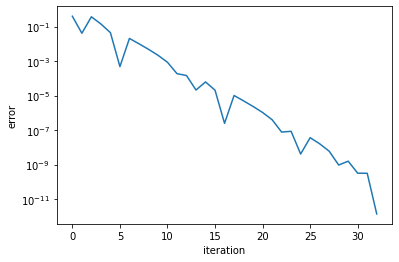

In [8]:
#Example 6.3
def L_5(x):
    return x/8*(63*math.pow(x,4)-70*x*x+15)
a,b=0.6,1
tol=1e-10
iter=0
error=100
record=[]
while error>tol:
    iter=iter+1
    x=(a+b)/2
    f_a=L_5(a)
    f_b=L_5(b)
    f_x=L_5(x)
    if f_a*f_x<0:
        a=a
        b=x
    else:
        b=b
        a=x
    error=abs(f_x)
    record.append(error)
print("End at iter %g,  error is %g"% (iter,error))
fig,ax=plt.subplots()
plt.plot(record)
plt.xlabel("iteration")
plt.ylabel("error")
ax.set_yscale("log")
plt.show()

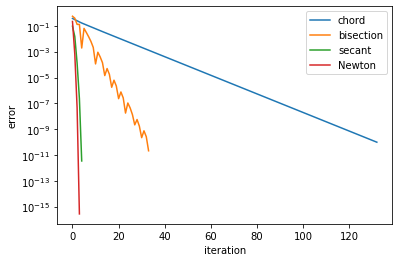

In [9]:
#Example 6.4
def function_1(x):
    return math.cos(2*x)**2-x**2
def function_1_d(x):
    return -4*math.cos(2*x)*math.sin(2*x)-2*x

def bisection(a,b,tol,func):
    iter=0
    error=100
    record=[]
    while error>tol:
        iter=iter+1
        x=(a+b)/2
        f_a=func(a)
        f_b=func(b)
        f_x=func(x)
        if f_a*f_x<0:
            a=a
            b=x
        else:
            b=b
            a=x
        error=abs(f_x)
        record.append(error)
    return x,error,record

def chord(a,b,tol,func,x_0):
    iter=0
    error=100
    record=[]
    x=x_0
    q=(func(b)-func(a))/(b-a)
    while error>tol:
        iter=iter+1
        x=x-1/q*func(x)
        error=abs(func(x))
        record.append(error)
    return x,error,record

def secant(tol,func,x_0,x_):
    iter=0
    error=100
    record=[]
    x=x_
    x_temp=x_0
    while error>tol:
        iter=iter+1
        q=(func(x_temp)-func(x))/(x_temp-x)
        y=x_temp-1/q*func(x_temp)
        x=x_temp
        x_temp=y
        error=abs(func(x_temp))
        record.append(error)
    return x,error,record

def Newton(tol,func,func_d,x_0):
    iter=0
    error=100
    record=[]
    x=x_0
    while error>tol:
        iter=iter+1
        q=func_d(x)
        x=x-1/q*func(x)
        error=abs(func(x))
        record.append(error)
    return x,error,record
        
x_1,error_1,record_1=chord(0,1.5,1e-10,function_1,0.75) #chord
x_2,error_2,record_2=bisection(0,1.5,1e-10,function_1) #bisection
x_3,error_3,record_3=secant(1e-10,function_1,0.75,0) #secant
x_4,error_4,record_4=Newton(1e-10,function_1,function_1_d,0.75) #Newton


fig,ax=plt.subplots()
plt.plot(record_1,label="chord")
plt.plot(record_2,label="bisection")
plt.plot(record_3,label="secant")
plt.plot(record_4,label="Newton")
plt.xlabel("iteration")
plt.ylabel("error")
ax.set_yscale("log")
plt.legend()
plt.show()


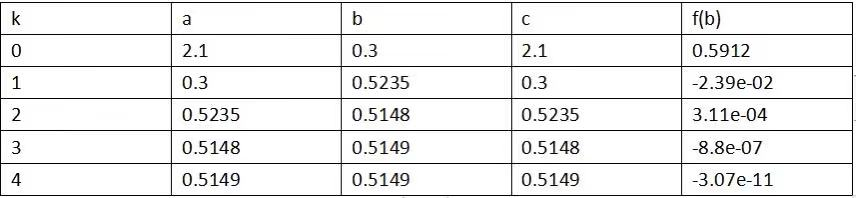

In [10]:
#Example 6.5 
#After running code in matlab, I got following table, which is consistent with example 6.5
from IPython.display import Image
Image(filename="C:/Users/shark/Documents/GitHub/Numerical-2020-Fall-Homework/Homework5/test.jpg")

In [11]:
#Example 6.6
def function_2(x):
    return x-math.pow(x,3)
def function_3(x):
    return x+math.pow(x,3)
 
x=1/2
for i in range(2000):
    x=function_2(x)

print("for func_2, fixed point iteration converges, after 2000 iter we get")
print(abs(x))

x=1/4
for i in range(13):
    x=function_3(x)
print("for func_3, fixed point iteration does not converge, after 13 iter")
print(abs(x))



for func_2, fixed point iteration converges, after 2000 iter we get
0.015782168989201623
for func_3, fixed point iteration does not converge, after 13 iter
5810349.086572366


In [12]:
#Example6.10
np.set_printoptions(edgeitems=3,infstr='inf',linewidth=75, nanstr='nan', precision=8,suppress=False, threshold=1000, formatter=None)
def fix_point_atiken(x_0,phi,itr,tol):
    error=100
    x=x_0
    record=[]
    for k in range(itr):
        if error>tol:
            x_1=phi(x)
            x_2=phi(x_1)
            xnew=x_2-(x_2-x_1)**2/(x_2-2*x_1+x)
            record.append(xnew)
            x=xnew
            error=np.abs(x-1)
    return x,record

def fix_point(x_0,phi,itr,tol):
    error=100
    x=x_0
    record=[]
    for k in range(itr):
        if error>tol:
            x=phi(x)
            record.append(x)
            error=np.abs(x-1)
    if error>=1:
        print("Diverges")
    return x,record

x_0=2
def phi_0(x):
    return cmath.log(x*cmath.exp(x))

def phi_1(x):
    return (np.exp(x)+x)/(np.exp(x)+1)

def phi_2(x):
    return (x**2-x+1)/x
    
print("Original Fixed point----------------------")
x,record=fix_point(x_0,phi_0,20,1e-10)
record=np.array(record)
print("For Phi_0 ,fter %g iter of fix-point, we receive  "%  len(record))
print(record[-1])
print("   ")

x,record=fix_point(x_0,phi_1,20,1e-10)
record=np.array(record)
print("For Phi_1 ,fter %g iter of fix-point, we receive  "%  len(record))
print(record[-1])
print("   ")

x,record=fix_point(x_0,phi_2,20,1e-10)
record=np.array(record)
print("For Phi_2 ,fter %g iter of fix-point, we receive  "%  len(record))
print(record[-1])
print("   ")

print("Atiken---------------------------")
x,record=fix_point_atiken(x_0,phi_0,20,1e-10)
record=np.array(record)
print("For Phi_0 ,fter %g iter of fix-point atiekn, we receive  "%  len(record))
print(record[-1])
print("   ")

x,record=fix_point_atiken(x_0,phi_1,20,1e-10)
record=np.array(record)
print("For Phi_1 ,fter %g iter of fix-point atiekn, we receive  "%  len(record))
print(record[-1])
print("   ")

x,record=fix_point_atiken(x_0,phi_2,20,1e-10)
record=np.array(record)
print("For Phi_2 ,fter %g iter of fix-point atiekn, we receive  "%  len(record))
print(record[-1])
print("   ")





Original Fixed point----------------------
Diverges
For Phi_0 ,fter 20 iter of fix-point, we receive  
(56.72083404466445+0j)
   
For Phi_1 ,fter 17 iter of fix-point, we receive  
1.0000000000793714
   
For Phi_2 ,fter 6 iter of fix-point, we receive  
1.000000000000094
   
Atiken---------------------------
For Phi_0 ,fter 9 iter of fix-point atiekn, we receive  
(0.999999999999524-1.6090478298038833e-11j)
   
For Phi_1 ,fter 3 iter of fix-point atiekn, we receive  
1.0000000000481342
   
For Phi_2 ,fter 5 iter of fix-point atiekn, we receive  
1.0
   


In [13]:
#Example 6.11
def Newton_standard(tol,func,func_d,x_0,p):
    iter=0
    error=100
    record=[]
    x=x_0
    while error>tol:
        iter=iter+1
        q=func_d(x,p)
        x=x-1/q*func(x,p)
        error=abs(x-1)
        record.append(x)
    print("p= %g ,iter %g "% (p,iter))
    return x,error,record

def Newton_modified(tol,func,func_d,x_0,p):
    iter=0
    error=100
    record=[]
    x=x_0
    while error>tol:
        iter=iter+1
        q=func_d(x,p)
        x=x-1/q*(p+1)*func(x,p)
        error=abs(x-1)
        record.append(x)
    print("p= %g ,iter %g "% (p,iter))
    return x,error,record

def Newton_adaptive(tol,func,func_d,x_0,p):
    iter=0
    error=100
    x=x_0
    record=[x]
    x=x-func(x,p)/func_d(x,p)
    record.append(x)
    x=x-func(x,p)/func_d(x,p)
    record.append(x)
    print(record)
    while error>tol:
        iter=iter+1
        mk=(record[-2]-record[-3])/(2*record[-2]-record[-1]-record[-3])
        q=func_d(record[-1],p)
        x=x-1/q*mk*func(record[-1],p)
        error=abs(x-1)
        record.append(x)
    # print("p= %g ,iter %g "% (p,iter))
    # print("m= %g"%mk)
    return x,error,record

def function_2(x,p):
    return pow(x**2-1,p)*np.log(x)

def function_2_d(x,p):
    return p*pow(x**2-1,p-1)*2*x*np.log(x)+1/x*pow(x**2-1,p)
print("For standard Newtwon---------------")
x,error,record=Newton_standard(1e-10,function_2,function_2_d,0.8,2) #Newton
x,error,record=Newton_standard(1e-10,function_2,function_2_d,0.8,4) #Newton
x,error,record=Newton_standard(1e-10,function_2,function_2_d,0.8,6) #Newton

print("For modified Newtwon---------------")
x,error,record=Newton_modified(1e-10,function_2,function_2_d,0.8,2) #Newton
x,error,record=Newton_modified(1e-10,function_2,function_2_d,0.8,4) #Newton
x,error,record=Newton_modified(1e-10,function_2,function_2_d,0.8,6) #Newton

print("For adaptive Newtwon---------------")
x,error,record=Newton_adaptive(1e-10,function_2,function_2_d,0.8,2) #Newton
print("p=2  , iter=13 , m=2.986")
x,error,record=Newton_adaptive(1e-10,function_2,function_2_d,0.8,4) #Newton
print("p=4  , iter=16 , m=4.91")
x,error,record=Newton_adaptive(1e-10,function_2,function_2_d,0.8,6) #Newton
print("p=6  , iter=18 , m=6.77")




For standard Newtwon---------------
p= 2 ,iter 53 
p= 4 ,iter 96 
p= 6 ,iter 139 
For modified Newtwon---------------
p= 2 ,iter 3 
p= 4 ,iter 4 
p= 6 ,iter 4 
For adaptive Newtwon---------------
[0.8, 0.869009949958992, 0.9136641185736817]
p=2  , iter=13 , m=2.986
[0.8, 0.8427724175569472, 0.8758775818417234]
p=4  , iter=16 , m=4.91
[0.8, 0.8309900306240274, 0.8568138785374182]
p=6  , iter=18 , m=6.77


In [14]:
# Example 7.1
def F(x):
    x_1=x[0,0]
    x_2=x[1,0]
    F_1=np.exp(x_1**2+x_2**2)-1
    F_2=np.exp(x_1**2-x_2**2)-1
    return np.array([[F_1,F_2]]).T
def Jacobbi_F(x):
    x_1=x[0,0]
    x_2=x[1,0]
    F_11=np.exp(x_1**2+x_2**2)*2*x_1
    F_12=np.exp(x_1**2+x_2**2)*2*x_2
    F_21=np.exp(x_1**2-x_2**2)*2*x_1
    F_22=-np.exp(x_1**2-x_2**2)*2*x_2
    J=np.array([[F_11,F_12],[F_21,F_22]])
    return J

def Newton_NLS(F,x_0,tol):
    error=100
    itr=1
    x=x_0
    while error>tol:
        itr=itr+1
        J=Jacobbi_F(x)
        x=x-LA.inv(J)@F(x)
        error=LA.norm(F(x))
        # print(error)
    return itr,x

x_0=np.array([[0.1,0.1]]).T
itr,x=Newton_NLS(F,x_0,1e-10)
print("From [0.1,0.1].T, after %g iter, we get"% itr)
print(x.T)


x_0=np.array([[10,10]]).T
itr,x=Newton_NLS(F,x_0,1e-10)
print("From [10,10].T, after %g iter, we get"% itr)
print(x.T)

x_0=np.array([[20,20]]).T
itr,x=Newton_NLS(F,x_0,1e-10)
print("From [20,20].T, after %g iter, we get"% itr)
print(x.T)
print("Diverge")


From [0.1,0.1].T, after 15 iter, we get
[[6.18511692e-06 6.18511692e-06]]
From [10,10].T, after 220 iter, we get
[[3.62378086e-06 3.62378071e-06]]
From [20,20].T, after 2 iter, we get
[[nan nan]]
Diverge


From [0.1,0.1].T, after 27 iter Newton, we get
[[1.32611642e-09 1.32587673e-09]]
From [0.1,0.1].T, after 36 iter Broyden, we get
[[7.05181983e-09 7.05181982e-09]]


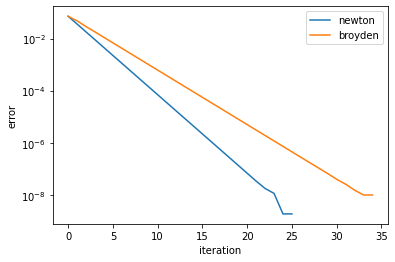

In [15]:
# Example 7.2
def Newton_NLS_2(F,x_0,tol):
    error=100
    itr=1
    x=x_0
    record=[]
    while error>tol:
        itr=itr+1
        J=Jacobbi_F(x)
        x=x-LA.inv(J)@F(x)
        error=LA.norm(x)
        record.append(error)
        if itr==27:
            break
        # print(error)
    return itr,x,record

x_0=np.array([[0.1,0.1]]).T
itr,x,record_newton=Newton_NLS_2(F,x_0,1e-10)
print("From [0.1,0.1].T, after %g iter Newton, we get"% itr)
print(x.T)

def Broyden_NLS_2(F,x_0,tol):
    error=100
    itr=1
    x=x_0
    J=Jacobbi_F(x)
    Q=J
    record=[]
    while error>tol:
        itr=itr+1
        s=-LA.inv(Q)@F(x)
        x_temp=x+s
        Q=Q+(F(x_temp)-F(x)-Q@s)@s.T/(s.T @ s)
        x=x_temp
        error=LA.norm(x)
        record.append(error)
        if itr==36:
            break
        # print(error)
    return itr,x,record

x_0=np.array([[0.1,0.1]]).T
itr,x,record_broyden=Broyden_NLS_2(F,x_0,1e-10)
print("From [0.1,0.1].T, after %g iter Broyden, we get"% itr)
print(x.T)


fig,ax=plt.subplots()
plt.plot(record_newton,label="newton")
plt.plot(record_broyden,label="broyden")
plt.xlabel("iteration")
plt.ylabel("error")
ax.set_yscale("log")
plt.legend()
plt.show()


In [16]:
def F_2(x):
    x_1=x[0,0]
    x_2=x[1,0]
    F_1=x_1+x_2-3
    F_2=x_1**2+x_2**2-9
    return np.array([[F_1,F_2]]).T

def Jacobbi_F_2(x):
    x_1=x[0,0]
    x_2=x[1,0]
    F_11=1
    F_12=2*x_1
    F_21=1
    F_22=2*x_2
    J=np.array([[F_11,F_12],[F_21,F_22]])
    return J

def Broyden_NLS_2(F_2,x_0,tol):
    error=100
    itr=1
    x=x_0
    J=Jacobbi_F_2(x)
    Q=J
    record=[]
    while error>tol:
        itr=itr+1
        s=-LA.inv(Q)@F_2(x)
        x_temp=x+s
        Q=Q+(F_2(x_temp)-F_2(x)-Q@s)@s.T/(s.T @ s)
        x=x_temp
        error=LA.norm(x)
        record.append(error)
        # print(x.T)
        if itr==11:
            break
        # print(error)
    return itr,x,record,Q

x_0=np.array([[2,4]]).T
itr,x,record_broyden,Q=Broyden_NLS_2(F_2,x_0,1e-10)
print("From [2,4].T, after %g iter Broyden, we get"% itr)
print(x.T)
print("Q is ")
print(Q)

From [2,4].T, after 11 iter Broyden, we get
[[-6.75447691e-04  3.00067544e+00]]
Q is 
[[  1.1219036    1.12298959]
 [-84.3876179  -79.06394885]]


In [23]:
## Section 6.8
def func_7(x):
    return np.exp(-x)-math.sin(x)
def Steffen(x_0,func,itr):
    x=x_0
    for i in range(itr):
        
        x=x-func(x)/(func(x+func(x))-func(x))*func(x)
        print(x)
    return x
x=Steffen(1,func_7,10)
pirnt(" root is 0.5885327439818611, behind is nan since (func(x+func(x))-func(x)) is too close to zero")

0.6008262651346761
0.5885558206852669
0.5885327440643301
0.5885327439818611
nan
nan
nan
nan
nan
nan
